## Cosmetics Brand Analysis
<p>The cosmetics industry is a 50 billion-dollar-a-year business in the US alone. Cosmetics sales are even used as an indicator for economic recessions (i.e., the "lipstick index").</p>
<p>You are working for a cosmetics start-up that plans to launch a new line of organic products. The launch will focus on the following cosmetics categories: fragrances, makeup, and skincare. Your task is to find the average prices for four competitor brands across these three categories. </p>
<p>You will be using data collected from Sephora's global store in your analysis. However, there are some additional requirements before you can present the results:</p>
<ul>
<li>The data available is unprocessed as received from Sephora. The start-up requests the categories as follows:</li>
</ul>
<table>
<thead>
<tr>
<th>New category</th>
<th style="text-align:left;">Existing categories to reclassify</th>
</tr>
</thead>
<tbody>
<tr>
<td>Fragrance</td>
<td style="text-align:left;">Perfume, Cologne</td>
</tr>
<tr>
<td>Makeup</td>
<td style="text-align:left;">Eye Palettes, Lipstick, Highlighter, Foundation, Mascara, Eyeliner, Makeup, Eyeshadow</td>
</tr>
<tr>
<td>Skincare</td>
<td style="text-align:left;">Moisturizers, Face Serums, Face Wash &amp; Cleansers, Face Masks, Face Primer, Body Lotions &amp; Body Oils,  Lotions &amp; Oils</td>
</tr>
</tbody>
</table>
<ul>
<li><p>Currently, it is unclear who the primary competitors are. Find the top four brands by the combined number of fragrance, makeup, and skincare products produced.</p></li>
<li><p>Exclude any products containing the toxic ingredient "toluene" from your analysis. Assume products with no ingredient information do not contain "toluene".</p></li>
<li><p>Product prices should be compared in USD. Below are the conversions for currencies found in the dataset:</p>
<ul>
<li>1 EUR = 1.22 USD</li>
<li>1 GBP = 1.42 USD</li>
<li>1 Yen = 0.01 USD</li></ul></li>
</ul>
<hr>
<p><em>The datasets available are listed below:</em></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/cosmetics.csv - Catalogue of cosmetics products, including brand, category, price, and other characteristics</b>
    </div>
    <div>Source: <a href="https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1">Kaggle</a></div>
<ul>
    <li><b>id: </b>The product id.</li>
    <li><b>brand: </b>The brand.</li>
    <li><b>category: </b>The category of product.</li>
    <li><b>name: </b>The name of the product.</li>
    <li><b>size: </b>The size of the product.</li>
    <li><b>price: </b>The price of the product (in various currencies).</li>
    <li><b>rating: </b>The consumer rating of the product.</li>
    <li><b>how_to_use: </b>Instructions for the product.</li>
    <li><b>online_only: </b>Whether or not the product is online-exclusive.</li>
    <li><b>limited_edition: </b>Whether or not the product is limited edition.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/ingredients.txt - A tab-delimited file containing the product IDs and ingredients for products in the cosmetics dataset</b>
    </div>
    <div>Source: <a href="https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1">Kaggle</a></div>
<ul>
    <li><b>product_id: </b>The product id (corresponding to the id column in the cosmetics dataset).</li>
    <li><b>ingredients: </b>The list of ingredients in the product.</li> 
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/cosmetics_categories.csv - Table containing the sub and broad categories for recategorization</b>
    </div>
<ul>
    <li><b>sub_category: </b>The sub categories that exist in the cosmetics CSV that need to be recategorized.</li>
    <li><b>broad_category: </b>The corresponding broader category to which the sub_category belongs to and needs to be recategorized as.</li> 
</ul>
    </div>

# Solution

### 1. Datasets' mini-exploration

In [500]:
import pandas as pd
import numpy as np

#### Cosmetic table

In [501]:
# Load the table
cosm = pd.read_csv('datasets/cosmetics.csv')

In [502]:
cosm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8632 entries, 0 to 8631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8632 non-null   int64  
 1   brand            8632 non-null   object 
 2   category         8632 non-null   object 
 3   name             8632 non-null   object 
 4   size             8632 non-null   object 
 5   price            8632 non-null   object 
 6   rating           8632 non-null   float64
 7   how_to_use       8632 non-null   object 
 8   online_only      8632 non-null   int64  
 9   limited_edition  8632 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 674.5+ KB


In [503]:
cosm.head()

,id,brand,category,name,size,price,rating,how_to_use,online_only,limited_edition
0,2218774,Acqua Di Parma,Perfume,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,USD 66,4.0,Suggested Usage:-Fragrance is intensified by t...,1,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,USD 66,4.5,no instructions,1,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,USD 180,4.5,no instructions,1,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,USD 120,4.5,no instructions,1,0
4,2218766,Acqua Di Parma,Perfume,Colonia Miniature Set,5 x 0.16oz/5mL,USD 72,3.5,Suggested Usage:-Fragrance is intensified by t...,1,0


In [504]:
# We do not need all these columns.
cosm = cosm[['id', 'brand', 'category', 'price']]

In [505]:
cosm.tail()

,id,brand,category,price
8627,2208502,SEPHORA COLLECTION,Face Masks,USD 6
8628,2298909,SEPHORA COLLECTION,Lip Sets,USD 15
8629,2236750,SEPHORA COLLECTION,Tinted Moisturizer,USD 16
8630,50,sephora collection,no category,USD 50
8631,304,SEPHORA COLLECTION,no category,USD 50


#### ! There are different 'capitalizations' of the brands ('SEPHORA COLLECTION' vs 'sephora collection')

#### Ingredients table

In [506]:
# Load table
ingr = pd.read_table('datasets/ingredients.txt', sep='\t')

In [507]:
ingr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8632 entries, 0 to 8631
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   8632 non-null   int64 
 1   ingredients  8632 non-null   object
dtypes: int64(1), object(1)
memory usage: 135.0+ KB


In [508]:
ingr.head()

,product_id,ingredients
0,2218774,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,2044816,unknown
2,1417567,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,1417617,unknown
4,2218766,Colonia: Alcohol Denat.- Water- Fragrance- Lim...


#### Let's check if product ids are identical for these two datasets

In [509]:
(set(cosm.id) == set(ingr.product_id)) & (len(cosm.id) == len(ingr.product_id))

True

#### Subcategories dictionary table

In [510]:
# Load table
subs = pd.read_csv('datasets/cosmetics_categories.csv')

In [511]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sub_category    17 non-null     object
 1   broad_category  17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [512]:
subs.head()

,sub_category,broad_category
0,Cologne,Fragrance
1,Perfume,Fragrance
2,Eye Palettes,Makeup
3,Lipstick,Makeup
4,Highlighter,Makeup


In [513]:
# Unique categories
subs.broad_category.unique()

array(['Fragrance', 'Makeup', 'Skincare'], dtype=object)

In [514]:
# Number of unique sucategories
subs.sub_category.nunique()

17

In [515]:
# Number of unique subcategories in the main dataset (cosmetic)
cosm.category.nunique()

138

In [516]:
set(cosm.category).intersection(set(subs.sub_category)) == set(subs.sub_category)

True

#### Thus, there are all sub_categories from cosmetics_categories datasets in cosmetics dataset

In [517]:
set(cosm.category).intersection(set(subs.broad_category))

{'Makeup'}

Alse, there is 'Makeup' category in cosmetics dataset.

### Conclusion: there are no NANs in datasets, all fields for joins are consistent.

### 2. Let's start from a data reduction task:
Exclude any products containing the toxic ingredient "toluene" from your analysis. Assume products with no ingredient information do not contain "toluene".

In [518]:
# Find the toxic products
ingr['is_toxic'] = ingr.ingredients.apply(lambda x: x.lower().find("toluene") >= 0)

In [519]:
ingr.head()

,product_id,ingredients,is_toxic
0,2218774,Arancia di Capri Eau de Toilette: Alcohol Dena...,False
1,2044816,unknown,False
2,1417567,Alcohol Denat.- Water- Fragrance- Limonene- Li...,False
3,1417617,unknown,False
4,2218766,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,False


In [520]:
print(f'The share of toxic products is {ingr["is_toxic"].sum()/ingr.shape[0]*100:.2f}%')

The share of toxic products is 13.97%


In [521]:
# Derive the toxic product ids from the ingredients dataset and filter the cosmetic table:
toxic_ids = ingr.loc[ingr.is_toxic, 'product_id'].values
cosm = cosm[~cosm.id.isin(toxic_ids)]

In [522]:
cosm.shape

(7426, 4)

### 3. Let's filter by categories:
The data available is unprocessed as received from Sephora. The start-up requests the categories...     
There are 17 sub categories from cosmetics_categories dataset 

In [523]:
# It should be merged right to exclude not required categories
cosm = cosm.merge(subs, how='right', left_on='category', right_on='sub_category')

In [524]:
cosm.head()

,id,brand,category,price,sub_category,broad_category
0,2044816,Acqua Di Parma,Cologne,USD 66,Cologne,Fragrance
1,1284462,Acqua Di Parma,Cologne,USD 120,Cologne,Fragrance
2,1059500,Acqua Di Parma,Cologne,USD 120,Cologne,Fragrance
3,1915396,ACQUA DI PARMA,Cologne,USD 245,Cologne,Fragrance
4,1775055,Acqua Di Parma,Cologne,USD 120,Cologne,Fragrance


In [525]:
cosm.broad_category.unique()

array(['Fragrance', 'Makeup', 'Skincare'], dtype=object)

In [526]:
# Rid off the rudimentary columns
cosm.drop(columns=['category', 'sub_category'], inplace=True)
cosm.rename(columns={'broad_category': 'category'}, inplace=True)

In [527]:
cosm.head()

,id,brand,price,category
0,2044816,Acqua Di Parma,USD 66,Fragrance
1,1284462,Acqua Di Parma,USD 120,Fragrance
2,1059500,Acqua Di Parma,USD 120,Fragrance
3,1915396,ACQUA DI PARMA,USD 245,Fragrance
4,1775055,Acqua Di Parma,USD 120,Fragrance


### 4. Let's select the brands:
Currently, it is unclear who the primary competitors are. Find the top four brands by the combined number of fragrance, makeup, and skincare products produced.

In [528]:
# We have found that 'capitalisation' for brands' names aren't consistent
cosm.brand = cosm.brand.str.capitalize()

In [529]:
# There are two ways to find the largest brands
# The first way:
cosm.brand.value_counts()[:4]

Clinique              112
Sephora collection    105
Tom ford              102
Dior                   94
Name: brand, dtype: int64

In [530]:
# The second way
largest_brands = cosm.groupby('brand')['id'].count().nlargest(4)
largest_brands

brand
Clinique              112
Sephora collection    105
Tom ford              102
Dior                   94
Name: id, dtype: int64

In [531]:
# Derive the largest brands as a set
largest_brands = set(largest_brands.index)
largest_brands

{'Clinique', 'Dior', 'Sephora collection', 'Tom ford'}

In [532]:
# Filter the main table
cosm = cosm[cosm.brand.isin(largest_brands)]

In [533]:
cosm.shape

(413, 4)

In [534]:
cosm.head()

,id,brand,price,category
46,346494,Clinique,USD 52,Fragrance
47,1739317,Dior,EUR 63,Fragrance
48,2038123,Dior,EUR 77,Fragrance
49,2310530,Dior,EUR 61,Fragrance
50,83246,Dior,EUR 61,Fragrance


### 5. Time for FX:
Product prices should be compared in USD. Below are the conversions for currencies found in the dataset:

1 EUR = 1.22 USD
1 GBP = 1.42 USD
1 Yen = 0.01 USD

In [535]:
# helper function
exchange_rate = {'EUR': 1.22, 'GBP': 1.42, 'Yen': 0.01, 'USD': 1}
def converter(x: str) -> float:
    """Convert string price from a format like 'EUR 34' to the float value in USD 
    accordingly to the exchange_rate dictionary """
    currency, value = x.split()
    value = float(value)
    return value * exchange_rate[currency]

In [536]:
# apply convertations
cosm.price = cosm.price.apply(converter)

In [537]:
cosm.head()

,id,brand,price,category
46,346494,Clinique,52.00,Fragrance
47,1739317,Dior,76.86,Fragrance
48,2038123,Dior,93.94,Fragrance
49,2310530,Dior,74.42,Fragrance
50,83246,Dior,74.42,Fragrance


### 6. Final step: building the pivot table for the brands' average price

In [538]:
brand_prices = pd.pivot_table(cosm,
                              index='brand',
                              columns='category',
                              values='price',
                             aggfunc =np.mean)
brand_prices = brand_prices.round(2)
brand_prices = brand_prices.sort_values('brand')
brand_prices.columns.name = None
brand_prices.index.name = None
brand_prices

,Fragrance,Makeup,Skincare
Clinique,58.00,24.08,36.90
Dior,92.85,39.12,88.08
Sephora collection,17.00,16.83,10.04
Tom ford,182.70,61.35,74.86


### 7. Bonus: the result visualization

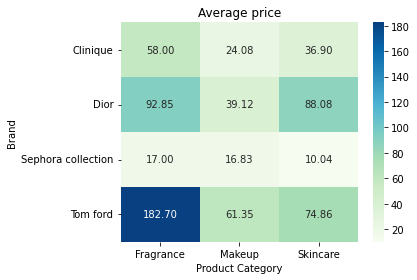

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(brand_prices, annot=True, fmt='.2f', cmap='GnBu')
plt.xlabel('Product Category')
plt.ylabel('Brand')
plt.title('Average price')
plt.show()

In [540]:
%%nose
import pandas as pd
import numpy as np
import re
from pandas.api.types import is_numeric_dtype
convert_index = lambda x: x.lower().strip()

# Specify solution DataFrame as a dictionary here
fragrance = [58.00, 92.85, 17.00, 182.70]
makeup = [24.08, 39.12, 16.83, 61.35]
skincare = [36.90, 88.08, 10.04, 74.86]
brands = ["clinique", "dior", "sephora collection", "tom ford"]
test_solution = pd.DataFrame(data={"fragrance": fragrance, "makeup": makeup, "skincare": skincare},
                            index=brands).sort_index()

def test_project():
    
    # Check whether the answer has been saved and is a DataFrame
    assert "brand_prices" in globals() and type(brand_prices) == pd.core.frame.DataFrame, \
    "Have you assigned your answer to a DataFrame named `brand_prices`?"
    
    # Having identified the existence of the DataFrame, convert all the column names to lower-case
    test_solution.columns = [x.lower() for x in test_solution.columns.tolist()]
    brand_prices.columns = [x.lower() for x in brand_prices.columns.tolist()]
    
    # Sort the index of the student DataFrame
    brand_prices.sort_index(inplace=True)
    
    # Check that the lower-case and whitespace stripped indexes are equal
    assert all(brand_prices.rename(convert_index).index == test_solution.rename(convert_index).index), \
    "Your index does not contain the expected brands!"
    
    # For each column in the DataFrame, ensure it's in the test_solution DataFrame
    assert all([x in test_solution.columns for x in brand_prices.columns]), \
    "Your DataFrame is missing the required columns!"
    
    # Check whether the values (converted to an integer) contain in the only column are correct
    for col in test_solution.columns.tolist():
        if is_numeric_dtype(test_solution[col]):
            assert (test_solution[col].astype(int).values == brand_prices[col].astype(int).values).all(),\
            "Your DataFrame does not contain the correct values!"
        else:
            assert (test_solution[col].str.lower().values == brand_prices[col].str.lower().values).all(),\
            "Your DataFrame does not contain the correct values!"

1/1 tests passed
